In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
import time
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras import Sequential
from sklearn.metrics import classification_report

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [28]:
df = pd.read_csv("landmark2.csv",on_bad_lines='skip')
X = df.drop(df.columns[0], axis = 1)
y = df[df.columns[0]]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

len(y_train.unique())

#y_train=keras.utils.to_categorical(y_train,27)
#y_test=keras.utils.to_categorical(y_test)

27

In [31]:
print("X_train shape" +  str(X_train.shape))
print("y_train shape" +  str(y_train.shape))
print("X_test shape" +  str(X_test.shape))
print("y_test shape" +  str(y_test.shape))

X_train shape(46196, 63)
y_train shape(46196,)
X_test shape(15399, 63)
y_test shape(15399,)


## Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model = RandomForestClassifier()

reg = model.fit(X_train,y_train)
stop1 = time.time()

Y_pred = model.predict(X_test)
stop2 = time.time()
apprentissage_RFC = round(stop1-start,3)
prediction_RFC = round(stop2-start,3)
print(f"Temps d'apprentissage : {apprentissage_RFC} s")
print(f"Temps d'apprentissage+prediction : {prediction_RFC} s")

Temps d'apprentissage : 50.859 s
Temps d'apprentissage+prediction : 51.497 s


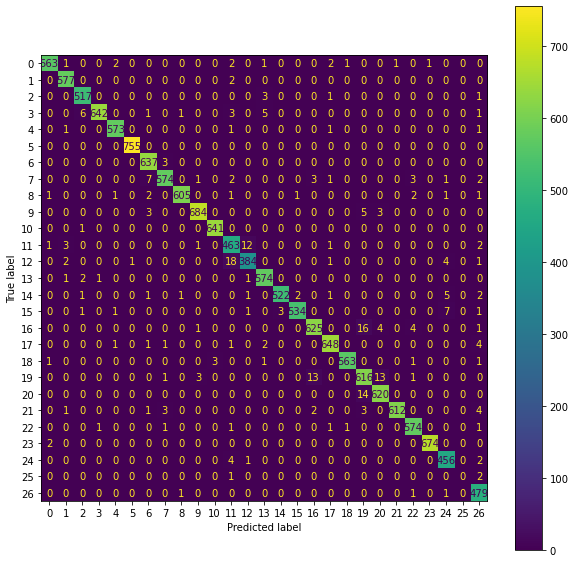

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = confusion_matrix(y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, Y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           A       0.99      0.98      0.99       574
           B       0.98      1.00      0.99       579
           C       0.98      0.99      0.98       522
           D       1.00      0.97      0.99       659
           E       0.99      0.99      0.99       577
           F       1.00      1.00      1.00       755
           G       0.98      1.00      0.99       640
           H       0.98      0.97      0.98       594
           I       1.00      0.98      0.99       615
           K       0.99      0.98      0.99       695
           L       1.00      1.00      1.00       642
           M       0.93      0.96      0.94       483
           N       0.96      0.93      0.95       411
           O       0.98      0.99      0.99       579
           P       0.99      0.97      0.98       536
           Q       0.99      0.97      0.98       548
           R       0.97      0.96      0.97       651
           S       0.99    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## CNN

In [35]:
from keras.layers import Conv2D,Flatten,MaxPool2D,BatchNormalization,Activation,Dropout
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [36]:
print("X_train shape" +  str(X_train.shape))
print("y_train shape" +  str(y_train.shape))
print("X_test shape" +  str(X_test.shape))
print("y_test shape" +  str(y_test.shape))

X_train shape(46196, 63)
y_train shape(46196,)
X_test shape(15399, 63)
y_test shape(15399,)


In [37]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=63, input_shape=[63]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=27, activation='softmax')
])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 63)                4032      
                                                                 
 dropout_3 (Dropout)         (None, 63)                0         
                                                                 
 dense_10 (Dense)            (None, 128)               8192      
                                                                 
 dense_11 (Dense)            (None, 256)               33024     
                                                                 
 dense_12 (Dense)            (None, 512)               131584    
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dropout_4 (Dropout)         (None, 512)              

In [38]:
model1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [39]:
y_train_encoded = pd.get_dummies(y_train, prefix='target')
y_test_encoded = pd.get_dummies(y_test, prefix='target')
y_train_encoded.head(3)

,target_A,target_B,target_C,target_D,target_E,target_F,target_G,target_H,target_I,target_K,...,target_S,target_T,target_U,target_V,target_W,target_X,target_Y,target_d,target_n,target_s
39877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5907,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

In [41]:
start = time.time()

history = model1.fit(
    X_train,
    y_train_encoded,
    validation_split =0.2,
    epochs=25,
    callbacks=[early_stop]
)

stop1 = time.time()


y_pred = model1.predict(X_test)

stop2 = time.time()
apprentissage_RFC = round(stop1-start,3)
prediction_RFC = round(stop2-start,3)
print(f"Temps d'apprentissage : {apprentissage_RFC} s")
print(f"Temps d'apprentissage+prediction : {prediction_RFC} s")

Epoch 1/25
1155/1155 [==============================] - 14s 10ms/step - loss: 0.8821 - accuracy: 0.6977 - val_loss: 0.2987 - val_accuracy: 0.8782
Epoch 2/25
1155/1155 [==============================] - 10s 9ms/step - loss: 0.3354 - accuracy: 0.8880 - val_loss: 0.1684 - val_accuracy: 0.9500
Epoch 3/25
1155/1155 [==============================] - 11s 9ms/step - loss: 0.2674 - accuracy: 0.9160 - val_loss: 0.2814 - val_accuracy: 0.9032
Epoch 4/25
1155/1155 [==============================] - 11s 9ms/step - loss: 0.2580 - accuracy: 0.9227 - val_loss: 0.2043 - val_accuracy: 0.9463
Epoch 5/25
1155/1155 [==============================] - 10s 9ms/step - loss: 0.2169 - accuracy: 0.9348 - val_loss: 0.1819 - val_accuracy: 0.9508
Epoch 6/25
1155/1155 [==============================] - 11s 9ms/step - loss: 0.2056 - accuracy: 0.9401 - val_loss: 0.1192 - val_accuracy: 0.9693
Epoch 7/25
1155/1155 [==============================] - 11s 9ms/step - loss: 0.1932 - accuracy: 0.9439 - val_loss: 0.1090 - val_a

In [17]:
 tf.saved_model.save(model1, r"C:/Users/Maxime.ALTER/ProjetIA/ProjetIA/Dev_max")

INFO:tensorflow:Assets written to: C:/Users/Maxime.ALTER/ProjetIA/ProjetIA/Dev_max\assets


INFO:tensorflow:Assets written to: C:/Users/Maxime.ALTER/ProjetIA/ProjetIA/Dev_max\assets


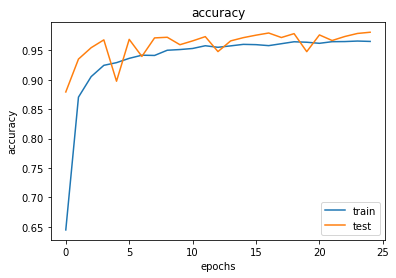

In [11]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["train","test"])

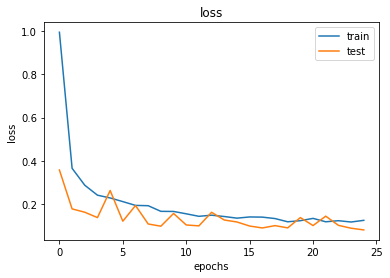

In [12]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train","test"])

In [42]:
liste_lettre=['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W',"X","Y"]
liste_nb = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

y_pred_value = np.argmax(y_pred, axis=1)
y_pred_value = pd.DataFrame(y_pred_value)


y_test2 = []

for value in y_test : 
    if value in liste_lettre:
        y_test2.append(liste_lettre.index(value))

print(y_test2)

[14, 19, 10, 17, 10, 12, 4, 17, 3, 9, 1, 16, 11, 4, 16, 6, 11, 15, 19, 0, 13, 12, 0, 9, 0, 17, 18, 21, 9, 5, 5, 10, 13, 11, 9, 9, 13, 21, 4, 1, 8, 17, 3, 17, 12, 2, 18, 15, 6, 19, 19, 11, 0, 16, 20, 9, 4, 12, 7, 23, 8, 2, 4, 1, 21, 12, 3, 14, 5, 16, 0, 22, 16, 16, 1, 17, 16, 3, 9, 5, 17, 4, 0, 10, 17, 14, 9, 11, 17, 5, 12, 11, 3, 23, 22, 12, 17, 10, 21, 7, 21, 0, 19, 9, 18, 22, 5, 18, 12, 7, 13, 8, 16, 1, 4, 19, 16, 10, 13, 17, 17, 3, 16, 16, 14, 8, 19, 22, 12, 12, 11, 22, 19, 15, 14, 3, 0, 23, 1, 8, 23, 12, 11, 17, 3, 13, 9, 2, 3, 6, 0, 6, 16, 0, 19, 6, 2, 21, 3, 20, 0, 20, 1, 7, 6, 0, 20, 20, 1, 21, 7, 17, 22, 1, 9, 17, 14, 15, 18, 5, 18, 17, 4, 11, 4, 12, 16, 11, 11, 5, 8, 4, 23, 10, 14, 6, 23, 14, 16, 10, 13, 19, 6, 19, 20, 4, 2, 19, 7, 9, 0, 10, 13, 14, 4, 3, 11, 21, 3, 1, 7, 20, 20, 8, 11, 17, 23, 9, 17, 11, 11, 10, 4, 15, 20, 13, 16, 0, 21, 19, 19, 6, 8, 19, 20, 16, 22, 5, 12, 17, 3, 3, 5, 12, 8, 12, 17, 9, 4, 6, 1, 10, 22, 15, 23, 0, 7, 18, 8, 19, 8, 8, 21, 4, 9, 14, 4, 0, 6, 0

In [43]:
print(y_test2.shape, y_pred_value.shape)
print(y_pred_cm)

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
print(classification_report(y_test, y_pred))

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test2,y_pred_value)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)

ValueError: Found input variables with inconsistent numbers of samples: [14451, 15399]